In [1]:
# Load the necessary python libraries
from sklearn import cluster, decomposition, preprocessing, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy


In [3]:
# These are your plotting settings. Change these, rerun this cell and the other cells to see the changes
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14,
                     'figure.figsize' : [10,6],
                     })

## CSV File Import

In [5]:
#Let's load the T1DEXI dataset and covert the dataset into a 'Data Frame', 
#which is an easier to read and use table format for storing data:
dataTable = pd.read_csv("dataT1DEXIfreeLiving.csv")

# The head and tail command will show us the first or last 5 instance and all the associated attributes
dataTable.head()

,Minimum_HR,Maximum_HR,Average_HR,Delta_HR,Standard_Dev_SC,Maximum_SC,Average_SC,Sum_SC,Activity
0,75,113,99.305085,2,6.034836,19.687500,15.311838,903.398437,Walking Dog Walking
1,92,125,112.296703,-3,8.052655,19.855469,10.994806,1000.527344,Walking Dog Walking
2,58,78,67.950000,-10,8.156938,19.687500,11.964681,717.880859,Walking Dog Walking
3,106,166,141.816667,46,5.568187,30.978516,15.667969,940.078125,Walking Dog Walking
4,86,117,106.032787,17,7.169885,18.648438,12.519883,763.712891,Walking Dog Walking


## Preprocess

In [6]:
#check if any nan values are present
check_nan_in_dataTable = dataTable.isnull().values.any()
print(check_nan_in_dataTable)

#if check_nan_in_df is true, remove the nan values with dropna()
clean_dataTable = dataTable.dropna()

False


## Scatter plot

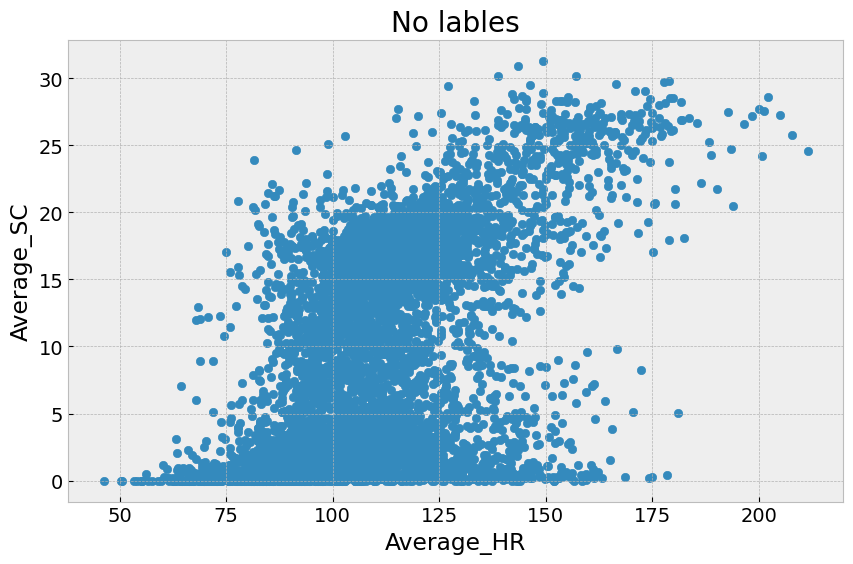

In [7]:
exerciseData_activityClassifier=clean_dataTable.loc[:,['Minimum_HR','Maximum_HR','Average_HR',
                                                       'Delta_HR','Standard_Dev_SC','Maximum_SC',
                                                       'Average_SC','Sum_SC']]
feature_1=2
feature_2=6

# A scatter plot with no class labels

plt.scatter(exerciseData_activityClassifier.iloc[:,feature_1], exerciseData_activityClassifier.iloc[:,feature_2]) # Here we are only plotting the first and second columns, which happen to be 'alcohol' and 'malic acid'
plt.xlabel(exerciseData_activityClassifier.columns[feature_1])
plt.ylabel(exerciseData_activityClassifier.columns[feature_2])
plt.title('No lables')


plt.show()

## Dataset rescaling

In [10]:
# Define a scaler which standardizes the data scales all 
#the data features in the range [0, 1] or else in the range [-1, 1] 
#if there are negative values in the dataset. 
#This usually improves stability and performance
scaler = preprocessing.MinMaxScaler().fit(exerciseData_activityClassifier) 

#Apply the scaler to the input data
df_scaled_X = scaler.transform(exerciseData_activityClassifier)


## k-means

[1 1 1 ... 0 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K-Means Clustering Results with k=3')

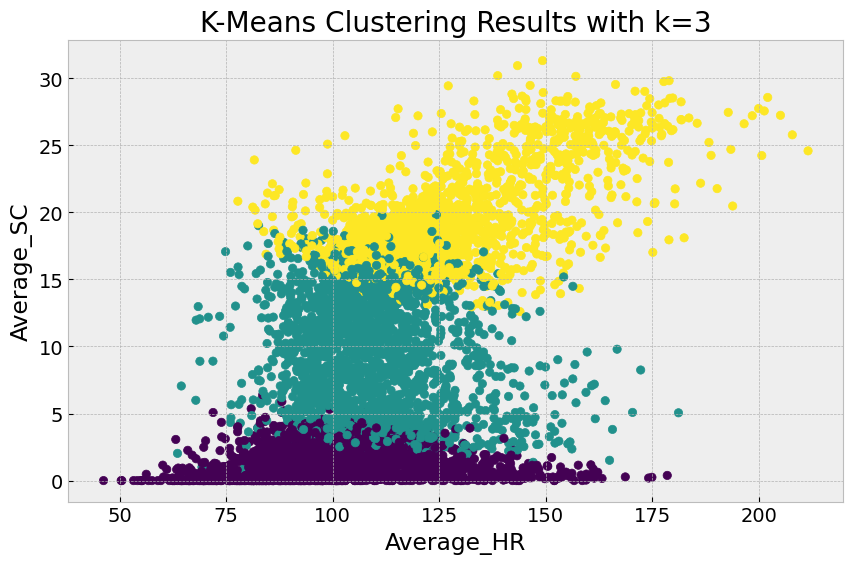

In [13]:
# First let's define some hyperparameters for the clustering algorithm. Come back here and try changing the values to see what affect this has on the clustering
# n_clusters: The number of clusters we think there are in the data (we know there are 3)
# max_iter: How many iterations the clustering algorithm should try for before stopping
n_clusters = 3
max_iter = 5000

k_means = cluster.KMeans(n_clusters=n_clusters, max_iter=max_iter) #We first define a k-means clustering object
k_means.fit(df_scaled_X) #Then we fit it to our 2 feature dataset
print(k_means.labels_)

# Now we can visualize the clustering results and compare it to the truth from the figure above 
plt.figure()
plt.scatter(exerciseData_activityClassifier.iloc[:,feature_1], 
            exerciseData_activityClassifier.iloc[:,feature_2], c=k_means.labels_)
plt.xlabel(exerciseData_activityClassifier.columns[feature_1])
plt.ylabel(exerciseData_activityClassifier.columns[feature_2])
plt.title('K-Means Clustering Results with k=3')

## PCA

The percent variance explained by the components is:  [51.76215875 15.77023836 13.87973281  7.39747177  5.09583691  4.11001445
  1.16180823  0.82273872]


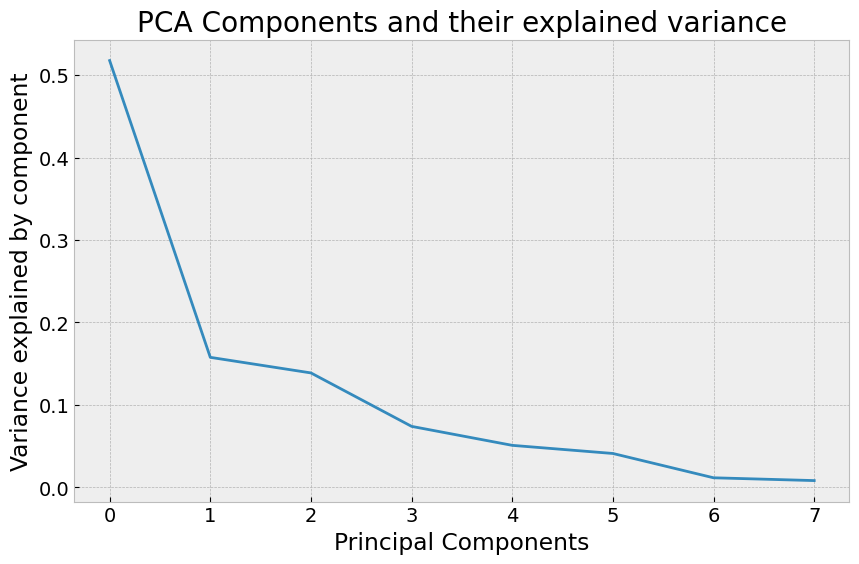

In [15]:
pca = decomposition.PCA() #Define a PCA object
pca.fit(df_scaled_X) # Solve PCA on the standardized  dataset
df_pca = pca.transform(df_scaled_X) 
# Transform dataset into the principal components as found by the PCA algorithm

# Let's visualize how important each component is by looking at how much variance each component explains:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance explained by component')
plt.title('PCA Components and their explained variance')
print("The percent variance explained by the components is: ", pca.explained_variance_ratio_ * 100)

## Plot PCA

Text(0.5, 1.0, 'First two principal components of the dataset')

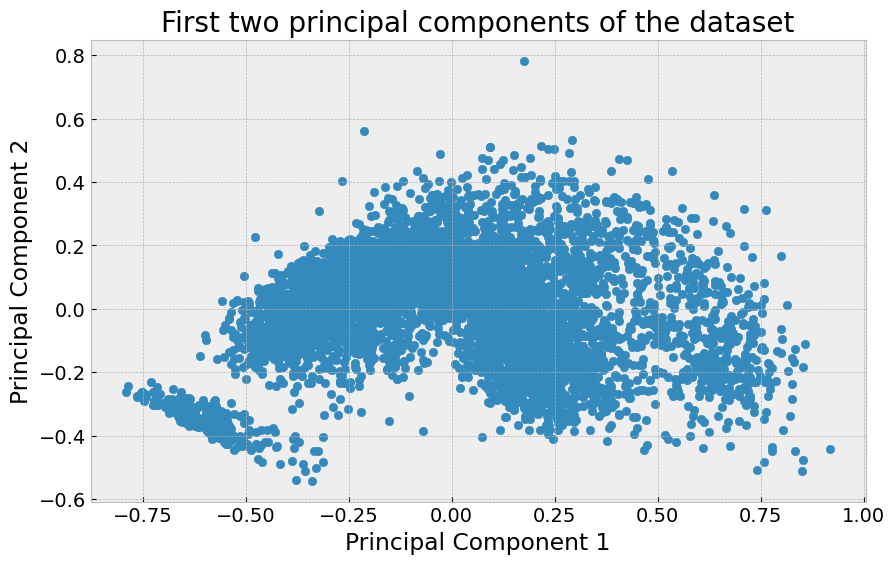

In [19]:
#Aside: try changing the PCA components to the other ones (try pca_1=11 and pca_2=12). Can you explain the difference in clustering?
pca_1 = 0 
pca_2 = 1

plt.figure()
plt.scatter(df_pca[:,pca_1], df_pca[:,pca_2])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two principal components of the dataset')